In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"

In [5]:
def parse_data(comp_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [match["match_id"] for match in matches]
    all_events = []
    for match_id in tqdm(match_ids):
        events = requests.get(url=match_url.format(match_id)).json()
        passes = [x for x in events if x["type"]["name"]=="Pass"]
        for p in passes:
            attributes = {
                "x": p["location"][0],
                "y": p["location"][1],
                "end_x": p["pass"]["end_location"][0],
                "end_y": p["pass"]["end_location"][1],
                "outcome": 0 if "outcome" in p["pass"].keys() else 1
            }
            all_events.append(attributes)
    return pd.DataFrame(all_events)

In [6]:
competition_id = 43
season_id = 3
df = parse_data(competition_id, season_id)

100%|██████████| 64/64 [00:55<00:00,  1.16it/s]


In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=50)

In [15]:
features = df[['x', 'y', 'end_x', 'end_y']]
fit = model.fit(features)

KeyboardInterrupt: 

In [20]:
df['cluster'] = model.fit_predict(features.values)
df.head(10)

,x,y,end_x,end_y,outcome,cluster
0,61.0,41.0,31.0,55.0,1,25
1,32.0,59.0,85.0,77.0,0,8
2,36.0,4.0,56.0,12.0,0,11
3,65.0,70.0,65.0,73.0,0,46
4,58.0,62.0,40.0,58.0,1,26
5,40.0,57.0,35.0,52.0,1,26
6,35.0,53.0,41.0,56.0,1,33
7,41.0,56.0,33.0,48.0,1,26
8,33.0,52.0,36.0,30.0,1,12
9,47.0,12.0,57.0,18.0,1,19


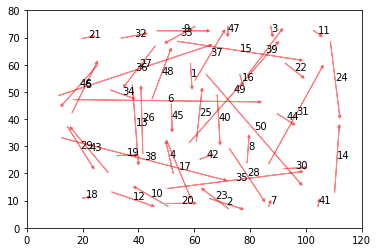

In [22]:
for i, (x, y, end_x, end_y) in enumerate(fit.cluster_centers_):
    plt.arrow(x, y, end_x-x, end_y-y,
              head_width=1,
              head_length=1,
              color='red',
              alpha=0.5,
              length_includes_head=True)
    
    plt.text((x+end_x)/2, (y+end_y)/2, str(i+1))
    
plt.xlim(0,120)
plt.ylim(0,80)
plt.show()

In [23]:
100 * (1+.07)**10

196.71513572895665

In [28]:
100 * (1+(.07/12))**(10*12)

200.9661376695633

In [29]:
100 * (1+(.07/365))**(365*10)

201.36175595831833

In [37]:
import math
100 * (math.e**.07)**(10)

201.37527074704775

In [44]:
math.e ** (.69314718)

1.9999999988801092

In [43]:
math.e ** 2.00794

7.447958738382237

In [49]:
h = 0.4
dh = 0.26
ndh = 0.022
nh = 0.6
(h*dh)/((h*dh) + (nh*ndh))

0.8873720136518771

In [53]:
priorProbability = 1/10000
likelihood = 0.95
nLikelihood = 0.02

(priorProbability * likelihood) / ((priorProbability * likelihood) + ((1-priorProbability) * nLikelihood))

#posteriorProbability =

0.004728014731498531

In [ ]:
priorP = 1/3
likelihoood = 1